# Master Thesis Data Analysis Python

## 1. Load in data

In [1]:
import os

print(os.getcwd())
os.chdir("C:/Users/siriv/Downloads/master_thesis/master_thesis_git/")
print(os.getcwd())

C:\Users\siriv\Downloads\master_thesis\master_thesis_git
C:\Users\siriv\Downloads\master_thesis\master_thesis_git


In [37]:
# import packages
import pandas as pd



# load in data
data = pd.read_csv("data_model.csv")
train = pd.read_csv("train_model.csv")
test = pd.read_csv("test_model.csv")

data = data.drop(["Unnamed: 0"], axis = 1)
train = train.drop(["Unnamed: 0"], axis = 1)
test = test.drop(["Unnamed: 0"], axis = 1)

data.shape, train.shape, test.shape

((10311, 24), (7733, 24), (2578, 24))

## 2. Prepare data for analysis

In [38]:
# check datatypes
print(train.dtypes)

lfdn                      int64
purchase_CHO              int64
purchase_PA               int64
purchase_GB               int64
rank_GB                   int64
rank_CHO                  int64
rank_CHEESE               int64
rank_WHEAT                int64
rank_TOM                  int64
age                       int64
gender                   object
country                   int64
education                object
occupation               object
av_income                 int64
environment              object
Country_Name             object
Generation               object
av_income_factorized     object
choice                   object
decision                  int64
price_cn                float64
price_no_cn             float64
product_type             object
dtype: object


In [39]:
# get feature matrix and outcome
X_train = train.drop(["decision"], axis = 1)
X_test = test.drop(["decision"], axis = 1)

y_train = train["decision"]
y_test = test["decision"]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7733, 23), (2578, 23), (7733,), (2578,))

In [40]:
# keep variables relevant for the analysis
drop_var = ["rank_GB", "rank_CHO", "rank_CHEESE", "rank_WHEAT", "rank_TOM", "country", "av_income", "Generation", "lfdn"]
X_train = X_train.drop(drop_var, axis = 1)
X_test = X_test.drop(drop_var, axis = 1)

# categorical features
cat_features = ["education", "occupation", "purchase_CHO", "purchase_PA", "purchase_GB", "gender",
               "Country_Name", "av_income_factorized", "choice", "product_type"]    # meow i guess
num_features = [feature for feature in X_train.columns if feature not in cat_features]

cat_features, num_features

(['education',
  'occupation',
  'purchase_CHO',
  'purchase_PA',
  'purchase_GB',
  'gender',
  'Country_Name',
  'av_income_factorized',
  'choice',
  'product_type'],
 ['age', 'environment', 'price_cn', 'price_no_cn'])

In [41]:
# create dataframe for variables that are supposed to be numeric here
X_train_num = X_train[num_features]
X_test_num = X_test[num_features]

# check datatypes
print(X_train_num.dtypes)

# check unique values of factor variable
X_train_num["environment"].unique()

age              int64
environment     object
price_cn       float64
price_no_cn    float64
dtype: object


array(['Priority', 'Not priority'], dtype=object)

In [42]:
# change factor variables to numeric
X_train_num["environment"].replace(["Priority", "Not priority"], [0, 1], inplace = True)
X_test_num["environment"].replace(["Priority", "Not priority"], [0, 1], inplace = True)

# change the datatypes of the numeric variables to float64
X_train_num = X_train_num.astype("float64")
X_test_num = X_test_num.astype("float64")

# check all datatypes
print(X_train_num.dtypes)

age            float64
environment    float64
price_cn       float64
price_no_cn    float64
dtype: object


C:\Users\siriv\AppData\Local\Temp\ipykernel_9044\998637070.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_num["environment"].replace(["Priority", "Not priority"], [0, 1], inplace = True)
C:\Users\siriv\AppData\Local\Temp\ipykernel_9044\998637070.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_num["environment"].replace(["Priority", "Not priority"], [0, 1], inplace = True)


In [43]:
# check variables
for var in X_train_num.columns:
    print(var, ":")
    print(X_train_num[var].unique())
    print()

age :
[54. 67. 60. 58. 50. 27. 26. 24. 64. 29. 18. 73. 28. 55. 23. 48. 61. 53.
 59. 25. 39. 46. 78. 49. 34. 45. 52. 57. 32. 62. 30. 71. 43. 35. 20. 56.
 47. 21. 38. 66. 22. 41. 68. 31. 33. 36. 70. 42. 63. 37. 65. 69. 19. 74.
 72. 17. 51. 40. 84. 44. 81. 77. 83. 82.]

environment :
[0. 1.]

price_cn :
[2.49 4.99 1.79 1.09 0.79 6.59 1.29 3.49]

price_no_cn :
[1.09 3.49 0.79 1.29 1.79 4.99 6.59 2.49]



In [44]:
# one-hot encode factor columns
X_train_fc = X_train[cat_features]
X_test_fc = X_test[cat_features]

X_train_fc.shape, X_test_fc.shape

((7733, 10), (2578, 10))

In [45]:
X_train_fc.dtypes

education               object
occupation              object
purchase_CHO             int64
purchase_PA              int64
purchase_GB              int64
gender                  object
Country_Name            object
av_income_factorized    object
choice                  object
product_type            object
dtype: object

In [46]:
X_train_fc = X_train_fc.astype("object")
X_test_fc = X_test_fc.astype("object")

X_train_fc.dtypes

education               object
occupation              object
purchase_CHO            object
purchase_PA             object
purchase_GB             object
gender                  object
Country_Name            object
av_income_factorized    object
choice                  object
product_type            object
dtype: object

In [47]:
from sklearn.preprocessing import OneHotEncoder

# set up encoder
oh_1 = OneHotEncoder(sparse = False, handle_unknown = "error")

# fit one-hot encoder on whole data to be sure to get all options
oh_1.fit(data[cat_features])

# transform train and test data according to fitted encoder
X_train_fc = oh_1.transform(X_train_fc)
X_test_fc = oh_1.transform(X_test_fc)

X_train_fc.shape, X_test_fc.shape

((7733, 78), (2578, 78))

In [48]:
# name variables
cat_features_names = [f"{col}_{cat}" for i, col in enumerate(cat_features) for cat in oh_1.categories_[i][0:]]
cat_features_names[:10]

["education_Bachelor's Degree",
 "education_Master's Degree",
 'education_None',
 'education_Ph.D. or higher',
 'education_Secondary School',
 'education_Secondary School Academic',
 'education_Secondary School General',
 'occupation_Employed',
 'occupation_In education or vocational training',
 'occupation_Looking for employment']

In [49]:
# add variable names to dataframe of categorical features
X_train_fc = pd.DataFrame(X_train_fc, columns = cat_features_names)
X_test_fc = pd.DataFrame(X_test_fc, columns = cat_features_names)

X_train_fc.shape, X_test_fc.shape

((7733, 78), (2578, 78))

In [50]:
# concat numerical and categorical dataframes
print("Expected number of columns: ", len(X_train_num.columns) + len(X_train_fc.columns))
X_train = pd.concat([X_train_num, X_train_fc], axis = 1).reindex(X_train_num.index)
X_test = pd.concat([X_test_num, X_test_fc], axis = 1).reindex(X_test_num.index)
print("Number of columns: ", len(X_train.columns))

Expected number of columns:  82
Number of columns:  82


In [51]:
# train-validation split for neural net
from sklearn.model_selection import train_test_split

X_train_2, X_valid, y_train_2, y_valid = train_test_split(X_train, y_train, test_size = 0.25)
X_train_2.shape, X_valid.shape, X_test.shape, y_train_2.shape, y_valid.shape, y_test.shape

((5799, 82), (1934, 82), (2578, 82), (5799,), (1934,), (2578,))

## Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf_1 = RandomForestClassifier(n_estimators = 1000, random_state = 0,
                             oob_score = True, max_depth = 20, 
                             min_samples_leaf = 5)
rf_1.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=1000,
                       oob_score=True, random_state=0)

In [18]:
y_test

0       2
1       2
2       2
3       1
4       2
       ..
2573    2
2574    2
2575    2
2576    2
2577    2
Name: decision, Length: 2578, dtype: int64

In [19]:
from sklearn.metrics import mean_absolute_error, r2_score

oob_score = rf_1.oob_score_
print(f'Out-of-Bag Score: {round(oob_score, 2)}')

predictions_1 = rf_1.predict(X_test)

mse_1 = mean_absolute_error(y_test, predictions_1)
print(f'Mean absolute error: {round(mse_1, 2)}')

Out-of-Bag Score: 0.86
Mean absolute error: 0.13


IndexError: list index out of range

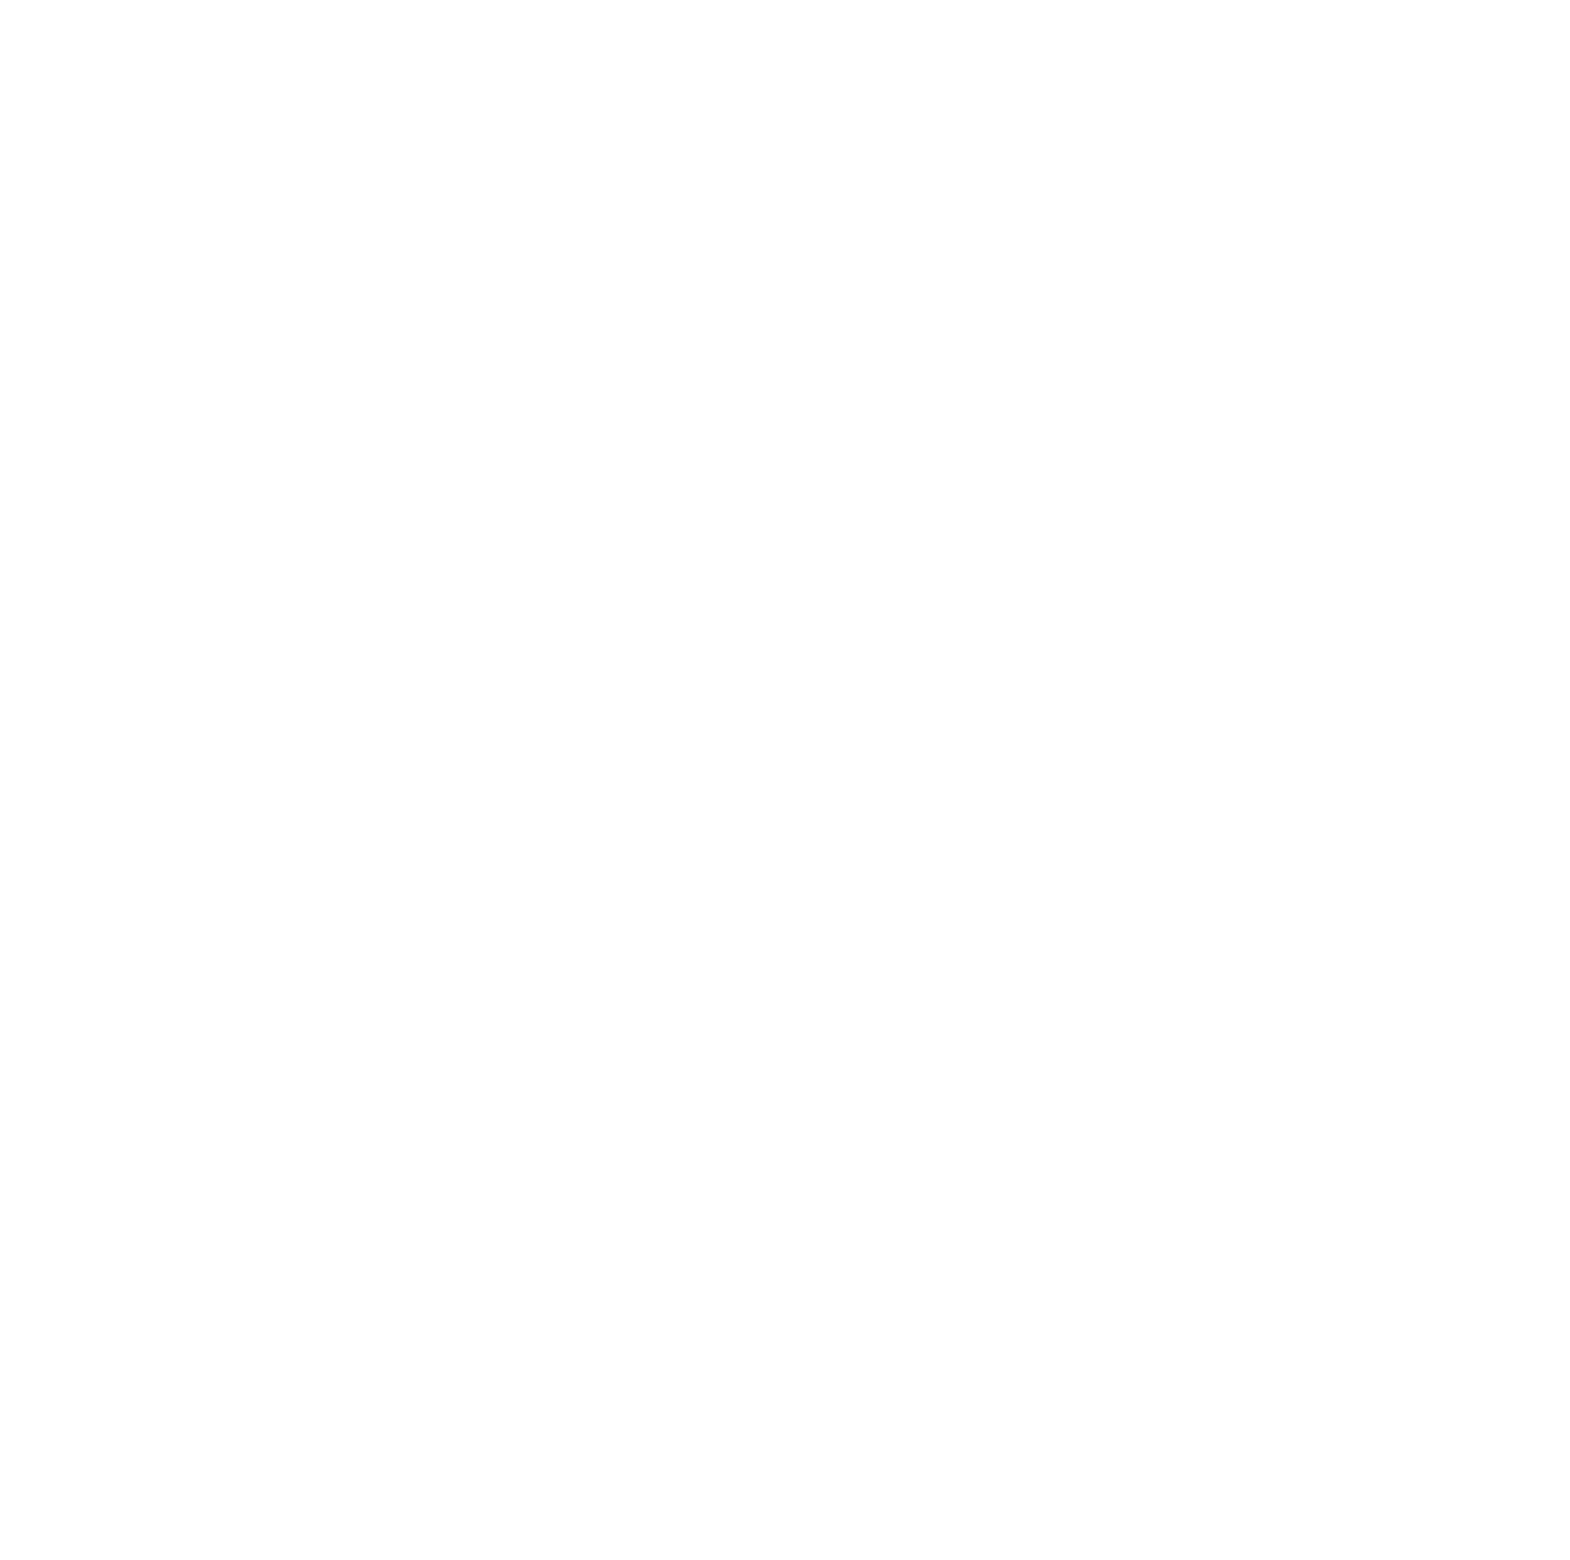

In [20]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

tree_to_plot_1 = rf_1.estimators_[0]

plt.figure(figsize = (20, 20))
plot_tree(tree_to_plot_1, feature_names = cat_features_names,
         filled = True, rounded = True, fontsize = 10)
plt.title("Decision tree 0 from random forest")
plt.show()

In [27]:
from sklearn.metrics import confusion_matrix

cm_1 = confusion_matrix(y_test, predictions_1)

<AxesSubplot:>

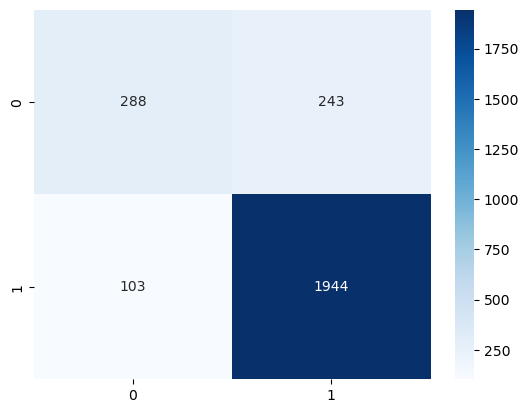

In [28]:
import seaborn as sns
import numpy as np

sns.heatmap(cm_1, annot = True, fmt = "g", cmap = "Blues")

In [21]:
# lets try mixed-effects random forest
#os.system("pip install merf")

0

In [29]:
from merf import MERF
import numpy as np

Z_train = np.ones((len(X_train), 1))
Z_test = np.ones((len(X_test), 1))

clusters_train = train["lfdn"]
clusters_test = test["lfdn"]

Z_train.shape, Z_test.shape, clusters_train.shape, clusters_test.shape

((7733, 1), (2578, 1), (7733,), (2578,))

In [30]:
merf_1 = MERF()
merf_1.fit(X_train, Z_train, clusters_train, y_train)

preds_merf = merf_1.predict(X_test, Z_test, clusters_test)

INFO     [merf.py:307] Training GLL is -19704.492468529665 at iteration 1.
INFO     [merf.py:307] Training GLL is -27219.146395078806 at iteration 2.
INFO     [merf.py:307] Training GLL is -27635.05923590169 at iteration 3.
INFO     [merf.py:307] Training GLL is -27714.378187095557 at iteration 4.
INFO     [merf.py:307] Training GLL is -27715.54078926284 at iteration 5.
INFO     [merf.py:307] Training GLL is -27723.5551859457 at iteration 6.
INFO     [merf.py:307] Training GLL is -27685.610161717257 at iteration 7.
INFO     [merf.py:307] Training GLL is -27742.606951436814 at iteration 8.
INFO     [merf.py:307] Training GLL is -27728.249266628216 at iteration 9.
INFO     [merf.py:307] Training GLL is -27753.690744825923 at iteration 10.
INFO     [merf.py:307] Training GLL is -27755.470337263592 at iteration 11.
INFO     [merf.py:307] Training GLL is -27745.516914259955 at iteration 12.
INFO     [merf.py:307] Training GLL is -27766.75373774813 at iteration 13.
INFO     [merf.py:307] Tra

<AxesSubplot:>

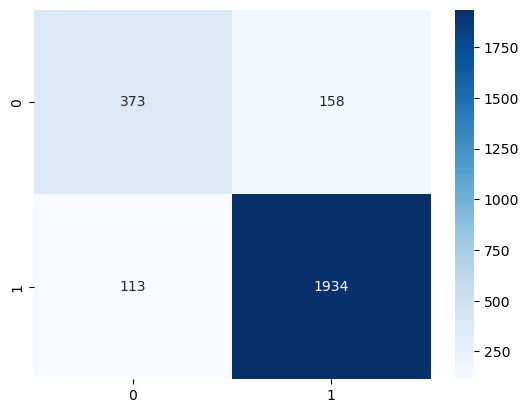

In [43]:
cm_2 = confusion_matrix(y_test.ravel(), round(pd.DataFrame(preds_merf)))
sns.heatmap(cm_2, annot = True, fmt = "g", cmap = "Blues")

## Support vector machines

In [69]:
from sklearn import svm

svm_1 = svm.SVC(kernel = "linear")
# sigmoid also kind of works, overfits with other kernel functions

svm_1.fit(X_train, y_train)

preds_svm = svm_1.predict(X_test)

<AxesSubplot:>

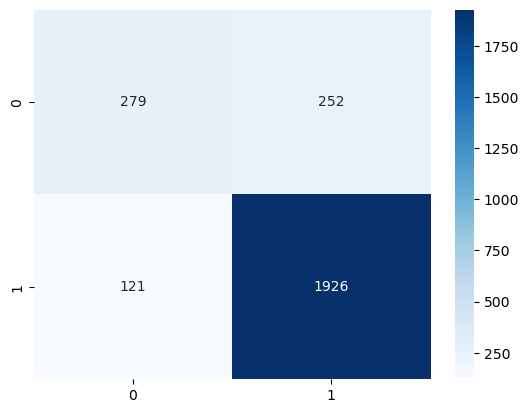

In [70]:
cm_3 = confusion_matrix(y_test.ravel(), preds_svm)
sns.heatmap(cm_3, annot = True, fmt = "g", cmap = "Blues")

## Neural net

In [19]:
# specify train and test datasets
from torch.utils.data import Dataset, DataLoader

# define classes for train, validation, and test data
class TrainDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    def __len__(self):
        return self.X.shape[0]
    def __getitem__(self):
        x = self.X
        y = self.y
        return x, y
    
class ValidDataset(TrainDataset):  # ValidDataset inherits attributes of TrainDataset
    def __getitem__(self):
        x = self.X
        return x

class TestDataset(TrainDataset):
    def __getitem__(self):
        x = self.x
        return x

# transform datasets using the classes
train_set = TrainDataset(X_train, y_train)
valid_set = ValidDataset(X_valid, y_valid)
test_set = TestDataset(X_test, y_test)

# define batch-size (first hyperparameter)
batch_size = 8

# define data-loaders using the defined batch_size
train_loader = DataLoader(train_set, batch_size = batch_size, shuffle = True)
valid_loader = DataLoader(valid_set, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test_set, batch_size = batch_size, shuffle = False)

In [42]:
# build the multi-layer perceptron
import torch
import torch.nn as nn

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

feature_num = X_train.shape[1]
hidden_size = 20
output_classes = 1
activation_function = nn.ReLU()

# simple MLP, one layer so far, we will add more later
class MLP(nn.Module):
    def __init__(self, feature_num, hidden_size, output_classes, activation_function):
        super(MLP, self).__init__()
        self.linear1 = nn.Linear(feature_num, hidden_size)
        self.linear2 = nn.Linear(hidden_size, hidden_size)
        self.linear3 = nn.Linear(hidden_size, output_classes)
        self.activation_function = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        x = self.activation_function(self.linear1(x))
        x = self.activation_function(self.linear2(x))
        x = self.activation_function(self.linear3(x))
        out = self.sigmoid(x)  # sigmoid for classification
        return out

In [52]:
# initialize model
model = MLP(feature_num, hidden_size, output_classes, activation_function).to(device)
# define optimizer and oprimization criterion
optimizer = torch.optim.Adam(model.parameters())
criterion = nn.MSELoss()

print(model)

MLP(
  (linear1): Linear(in_features=82, out_features=20, bias=True)
  (linear2): Linear(in_features=20, out_features=20, bias=True)
  (linear3): Linear(in_features=20, out_features=1, bias=True)
  (activation_function): ReLU()
  (sigmoid): Sigmoid()
)


In [57]:
# define number of epochs (next hyperparameter)
epochs = 100


# function to train model
def train_model(model, train_loader, optimizer, criterion, batch_size, device):
    
    train_loss = 0
    train_acc = 0

    model.train()
    #for batch_idx, batch_data in enumerate(train_loader):
    if 1 == 1:    
        # reset gradient
        optimizer.zero_grad()
        
        # define data for this iteration
        x, y = torch.from_numpy(X_train.values), torch.from_numpy(y_train.values)  #batch_data
        x = x.to(device)
        y = y.to(device)
        
        # run data trough model
        output = model(x.to(torch.float32))
        
        # calculate loss
        output = torch.flatten(output).numpy()
        loss = criterion(output, y)
        loss.backward()
        losses.append(loss.item())
        acc = (output.round() == y).float().mean()
        
        # accuracy and loss for return
        train_loss += loss.item()
        train_acc += acc.item()
        
        # update parameters
        optimizer.step()
        
    return train_loss / batch_idx, train_acc / batch_idx
        
        
def evaluate_model(model, valid_loader, criterion, batch_size, device):
    
    valid_loss = 0
    valid_acc = 0
    
    model.eval()
    
    with torch.no_grad():
        #for batch_idx, batch_data in enumerate(valid_loader):
            x, y = X_valid.values, y_valid.values  #batch_data
            x = x.to(device)
            y = y.to(device)
            
            output = model(x)
            
            loss = criterion(output, y)
            acc = (output.round() == y).float().mean()
            
            valid_loss += loss.item()
            valid_acc += acc.item()
            
    return valid_loss / batch_idx, valid_acc / batch_idx
    

def test_model(model, test_loader, criterion, batch_size, device):
    
    test_loss = 0
    test_acc = 0
    
    model.eval()
    
    with torch.no_grad():
        #for batch_idx, batch_data in enumerate(test_loader):
            x, y = X_test.values, y_test.values  #batch_data
            x = x.to_device()
            y = y.to_device()
            
            output = model(x)
            
            loss = criterion(output, y)
            acc = (output.round() == y).float().mean()
            
            test_loss += loss.item()
            test_acc += acc.item()
            
    return output, test_loss / batch_idx, test_acc / batch_idx

In [58]:
# model training
import numpy as np

best_loss = - np.inf
best_weights = None

for epoch in range(epochs):
    
    train_loss, train_acc = train_model(model, train_loader, optimizer, criterion, batch_size, device)
    valid_loss, valid_acc = valid_model(model, valid_loader, criterion, batch_size, device)
    
    if valid_loss > best_loss:
        best_loss = valid_loss
        torch.save(model.state_dict(), "mlp_1.pt")
    
    print(f"Epoch: {epoch+1:02}")
    print(f"\Train Loss: {train_loss:.3f} | Train Accuracy: {train_acc:.2f}%")
    print(f"\Validation Loss: {valid_loss:.3f} | Validation Accuracy: {valid_acc:.2f}%")

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

In [ ]:
# try model accuracy on test data
model.state_dict(torch.load("mlp_1.pt"))

predictions_mlp, test_loss, test_acc = evaluate(model, test_loader, criterion, device)

print(f"Test Loss: {test_loss:.3f} | Test Accuracy: {test_acc:.2f}")

In [ ]:
cm_4 = confusion_matrix(y_test.ravel(), predictions_mlp)
sns.heatmap(cm_4, annot = True, fmt = "g", cmap = "Blues")

In [ ]:
# other approach for now

In [80]:
import tensorflow as tf
import keras
from tensorflow.keras import layers, models

model_2 = models.Sequential()

layer_1 = layers.Dense(1000, activation = "relu")
layer_3 = layers.Dense(1, activation = "sigmoid")

model_2.add(layers.InputLayer(input_shape = (X_train.shape[1],)))
model_2.add(layer_1)
model_2.add(layer_3)

sgd = keras.optimizers.SGD(learning_rate = 0.1)

In [83]:
model_2.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1000)              83000     
                                                                 
 dense_8 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 84,001
Trainable params: 84,001
Non-trainable params: 0
_________________________________________________________________


In [84]:
history_2 = model_2.fit(X_train_np, y_train, validation_data = (X_test_np, y_test), epochs = 10, batch_size = 8)
model_2_eval = model_2.evaluate(X_test, y_test)
model_2_eval

Epoch 1/10
967/967 [==============================] - 1s 903us/step - loss: 0.3902 - accuracy: 0.8307 - val_loss: 0.3359 - val_accuracy: 0.8503
Epoch 2/10
967/967 [==============================] - 1s 819us/step - loss: 0.3521 - accuracy: 0.8452 - val_loss: 0.3252 - val_accuracy: 0.8549
Epoch 3/10
967/967 [==============================] - 1s 855us/step - loss: 0.3374 - accuracy: 0.8528 - val_loss: 0.3082 - val_accuracy: 0.8666
Epoch 4/10
967/967 [==============================] - 1s 812us/step - loss: 0.3254 - accuracy: 0.8603 - val_loss: 0.3295 - val_accuracy: 0.8588
Epoch 5/10
967/967 [==============================] - 1s 836us/step - loss: 0.3231 - accuracy: 0.8583 - val_loss: 0.3188 - val_accuracy: 0.8530
Epoch 6/10
967/967 [==============================] - 1s 823us/step - loss: 0.3111 - accuracy: 0.8628 - val_loss: 0.3065 - val_accuracy: 0.8646
Epoch 7/10
967/967 [==============================] - 1s 815us/step - loss: 0.3075 - accuracy: 0.8654 - val_loss: 0.3271 - val_accuracy:

[0.305076539516449, 0.8727695941925049]

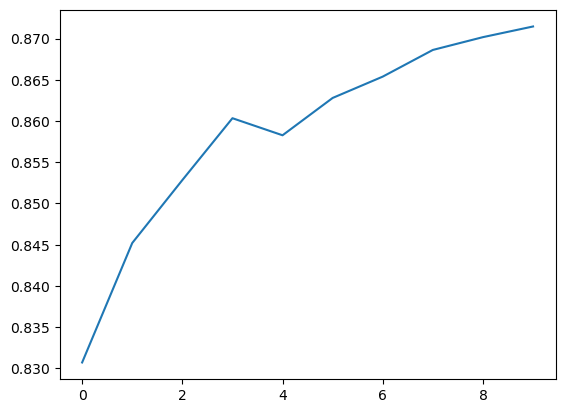

In [85]:
import matplotlib.pyplot as plt

plt.plot(history_2.history["accuracy"])
plt.show()

81/81 [==============================] - 0s 503us/step


<AxesSubplot:>

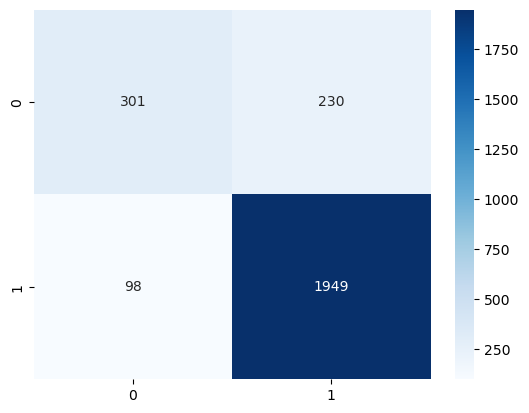

In [86]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

preds_mlp = np.round(model_2.predict(X_test_np), 0)

cm_5 = confusion_matrix(y_test, preds_mlp)

sns.heatmap(cm_5, annot = True, fmt = "g", cmap = "Blues")

In [58]:
y_train.value_counts()

2    6155
1    1578
Name: decision, dtype: int64

In [59]:
y_train = pd.DataFrame(y_train)
y_train = y_train.replace({1:0, 2:1})
y_train.value_counts()

decision
1           6155
0           1578
dtype: int64

In [71]:
y_test = pd.DataFrame(y_test)
y_test = y_test.replace({1:0, 2:1})
y_test.value_counts()

decision
1           2047
0            531
dtype: int64

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10311 entries, 0 to 10310
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   lfdn                  10311 non-null  int64  
 1   purchase_CHO          10311 non-null  int64  
 2   purchase_PA           10311 non-null  int64  
 3   purchase_GB           10311 non-null  int64  
 4   rank_GB               10311 non-null  int64  
 5   rank_CHO              10311 non-null  int64  
 6   rank_CHEESE           10311 non-null  int64  
 7   rank_WHEAT            10311 non-null  int64  
 8   rank_TOM              10311 non-null  int64  
 9   age                   10311 non-null  int64  
 10  gender                10311 non-null  object 
 11  country               10311 non-null  int64  
 12  education             10311 non-null  object 
 13  occupation            10311 non-null  object 
 14  av_income             10311 non-null  int64  
 15  environment        

In [62]:
X_train_np = np.array(X_train)
y_train_np = y_train.values

X_train_np.shape, y_train_np.shape

((7733, 82), (7733, 1))

In [63]:
X_train_np

array([[54.  ,  0.  ,  2.49, ...,  0.  ,  0.  ,  1.  ],
       [67.  ,  0.  ,  4.99, ...,  0.  ,  1.  ,  0.  ],
       [60.  ,  0.  ,  1.79, ...,  0.  ,  0.  ,  1.  ],
       ...,
       [60.  ,  0.  ,  2.49, ...,  0.  ,  0.  ,  1.  ],
       [60.  ,  0.  ,  3.49, ...,  0.  ,  1.  ,  0.  ],
       [43.  ,  1.  ,  1.79, ...,  0.  ,  0.  ,  1.  ]])

In [67]:
model = Sequential()
model.add(Dense(16, input_shape = (X_train_np.shape[1],), activation = "relu"))
model.add(Dense(16, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
model.summary()

model.compile(optimizer = "Adam",
             loss = "binary_crossentropy",
             metrics = ["accuracy"])

es = EarlyStopping(monitor = "val_accuracy",
                  mode = "max",
                  patience = 10,
                  restore_best_weights = True)

history = model.fit(X_train_np,
                   y_train_np,
                   callbacks=[es],
                   epochs=80,
                   batch_size = 10,
                   validation_split = 0.2,
                   shuffle = True,
                   verbose = 1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                1328      
                                                                 
 dense_5 (Dense)             (None, 16)                272       
                                                                 
 dense_6 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,617
Trainable params: 1,617
Non-trainable params: 0
_________________________________________________________________
Epoch 1/80
619/619 [==============================] - 1s 1ms/step - loss: 0.4987 - accuracy: 0.7892 - val_loss: 0.4968 - val_accuracy: 0.7757
Epoch 2/80
619/619 [==============================] - 1s 841us/step - loss: 0.3800 - accuracy: 0.8251 - val_loss: 0.3753 - val_accuracy: 0.8274
Epoch 3/80
619/619 [==========

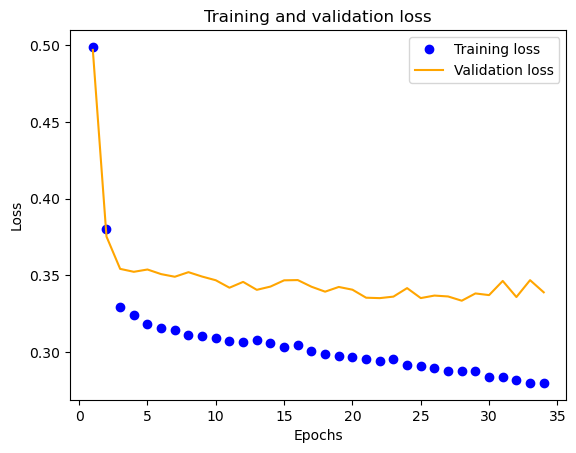

In [69]:
history_dict = history.history

loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label = "Training loss")
plt.plot(epochs, val_loss_values, "orange", label = "Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

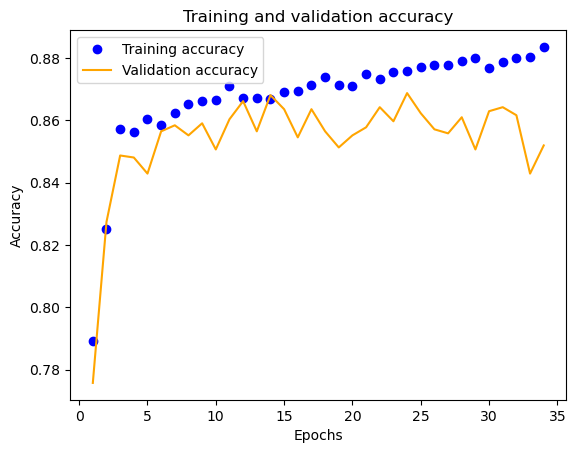

0.8687782883644104

In [70]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label = "Training accuracy")
plt.plot(epochs, val_acc, "orange", label = "Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

np.max(val_acc)

In [73]:
X_test_np = np.array(X_test)

In [76]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

preds_bmlp = np.round(model.predict(X_test_np), 0)

print(confusion_matrix(y_test, preds_bmlp))

print(classification_report(y_test, preds_bmlp))

81/81 [==============================] - 0s 424us/step
[[ 279  252]
 [  91 1956]]
              precision    recall  f1-score   support

           0       0.75      0.53      0.62       531
           1       0.89      0.96      0.92      2047

    accuracy                           0.87      2578
   macro avg       0.82      0.74      0.77      2578
weighted avg       0.86      0.87      0.86      2578



<AxesSubplot:>

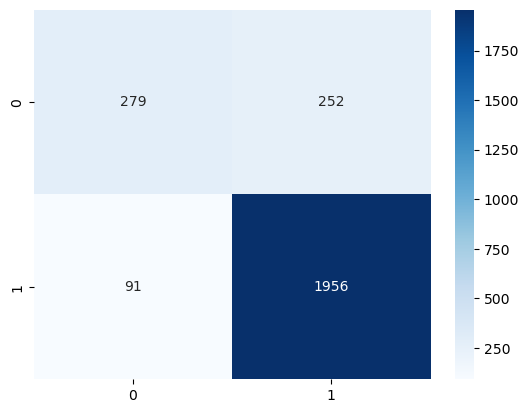

In [79]:
import seaborn as sns

cm_6 = confusion_matrix(y_test, preds_bmlp)
sns.heatmap(cm_6, annot = True, fmt = "g", cmap = "Blues")